# Exploratory Data Analysis  

This is just check and see the dataset detailed

(10/27/2022) not final virsion, it will be modified later 


## Import

In [1]:
import numpy as np
import pandas as pd
import os
import math

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import r# Collecting Dataset Code 

(10/27/2022) not final virsion, it will be modified later 
cParams
%matplotlib inline

In [2]:
path = "./Dataset/"

data_01 = pd.read_csv(path+"Dataset01/gesture01.csv")
data_02 = pd.read_csv(path+"Dataset02/gesture02.csv")
data_03 = pd.read_csv(path+"Dataset03/gesture03.csv")
data_04 = pd.read_csv(path+"Dataset04/gesture04.csv")
data_05 = pd.read_csv(path+"Dataset05/gesture05.csv")
data_06 = pd.read_csv(path+"Dataset06/gesture06.csv")
data_07 = pd.read_csv(path+"Dataset07/gesture07.csv")
data_08 = pd.read_csv(path+"Dataset08/gesture08.csv")
dataset = [data_01, data_02, data_03, data_04,
           data_05, data_06, data_07, data_08]

data_08

,Unnamed: 0,0,1,2,3,4,0.1,1.1,2.1
0,0,HandLandmark.WRIST,Right,0.687574,0.491470,-6.200000e-07,0.000000,0.000000,0.000000
1,1,HandLandmark.THUMB_CMC,Right,0.588408,0.525052,-2.041270e-02,-0.099165,0.033582,-0.020412
2,2,HandLandmark.THUMB_MCP,Right,0.507800,0.573952,-4.329453e-02,-0.179774,0.082482,-0.043294
3,3,HandLandmark.THUMB_IP,Right,0.448820,0.604316,-6.390089e-02,-0.238754,0.112846,-0.063900
4,4,HandLandmark.THUMB_TIP,Right,0.393126,0.592706,-8.830381e-02,-0.294448,0.101237,-0.088303
...,...,...,...,...,...,...,...,...,...
6295,6295,HandLandmark.RING_FINGER_TIP,Left,0.420946,0.777385,-1.340859e-01,0.083486,0.384060,-0.134087
6296,6296,HandLandmark.PINKY_MCP,Left,0.320185,0.534711,-8.965563e-02,-0.017274,0.141386,-0.089656
6297,6297,HandLandmark.PINKY_PIP,Left,0.335777,0.626456,-1.170147e-01,-0.001683,0.233131,-0.117015
6298,6298,HandLandmark.PINKY_DIP,Left,0.346949,0.685705,-1.289576e-01,0.009490,0.292380,-0.128958


## Missing Value Check

<AxesSubplot:>

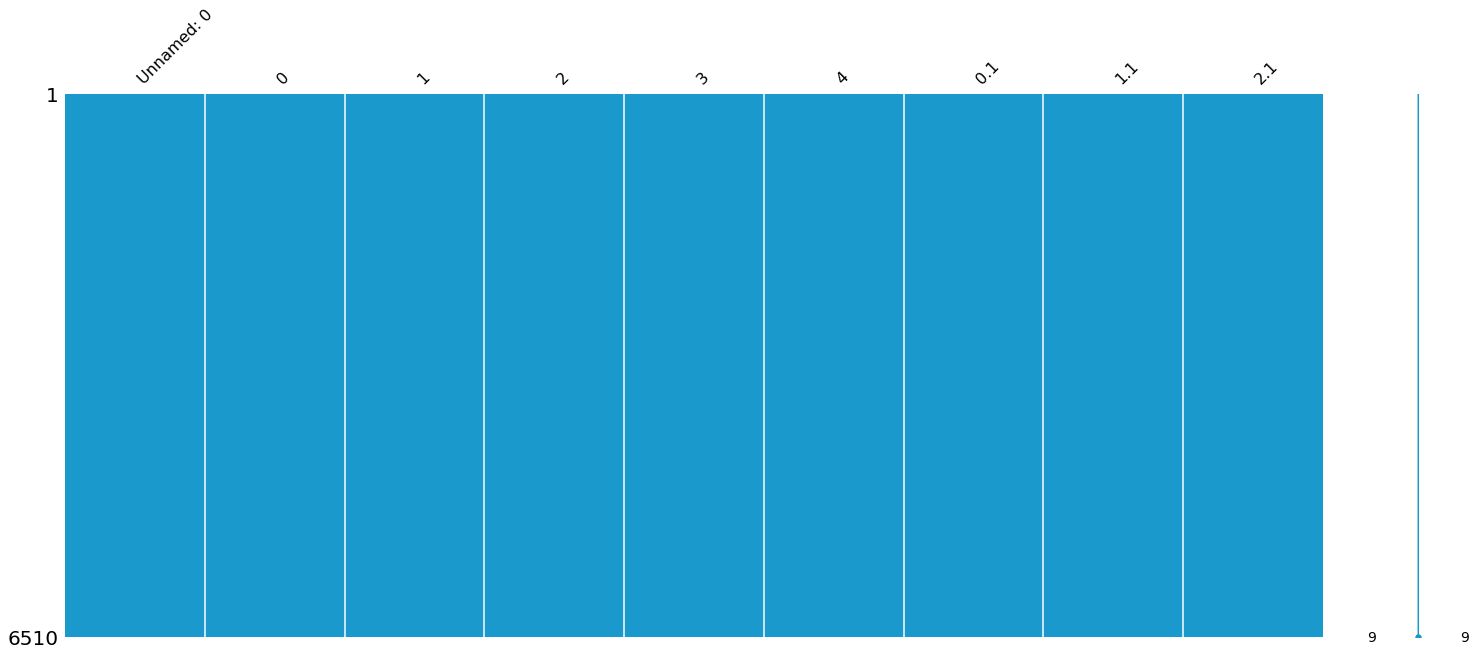

In [4]:
# There are no any missing values completely 
msno.matrix(data_01.iloc[:, :], color=(0.1, 0.6, 0.8))

## Preprocessing for Detailed EDA

- right: 0, left: 1

In [5]:
def preprocessed_data(data) :
    data = data.drop(['Unnamed: 0'], axis=1)
    data[['split1', 'landmark']] = data['0'].str.split('.', n=1, expand=True)
    data = data.drop(['split1', '0'], axis=1)
    data['1'] = data['1'].replace({'Right': 0, 'Left': 1})
    return data  

In [6]:
processed_dataset = []
for data in dataset :
    processed_data = preprocessed_data(data)
    processed_dataset.append(processed_data)

## Histogram

In [7]:
# check the data distribution using histogram
def check_histogram(data, columns, row, col) :
    plt.style.use("ggplot") 
    plt.figure(figsize=(17,10))
    plt.suptitle("Data Histogram", fontsize=20)
    
    for i in range(len(columns)):
        plt.subplot(row,col,i+1)
        plt.title(columns[i], fontsize=15)
        # Blue if there are more than 20 types of values
        if len(data[columns[i]].unique()) > 20:  
            plt.hist(data[columns[i]], color='b', alpha=0.7)
        # else orange
        else: 
            temp = data[columns[i]].value_counts()
            plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
            plt.xticks(temp.keys())

    plt.tight_layout(rect=[0, 0.01, 1, 0.95])
    plt.show()

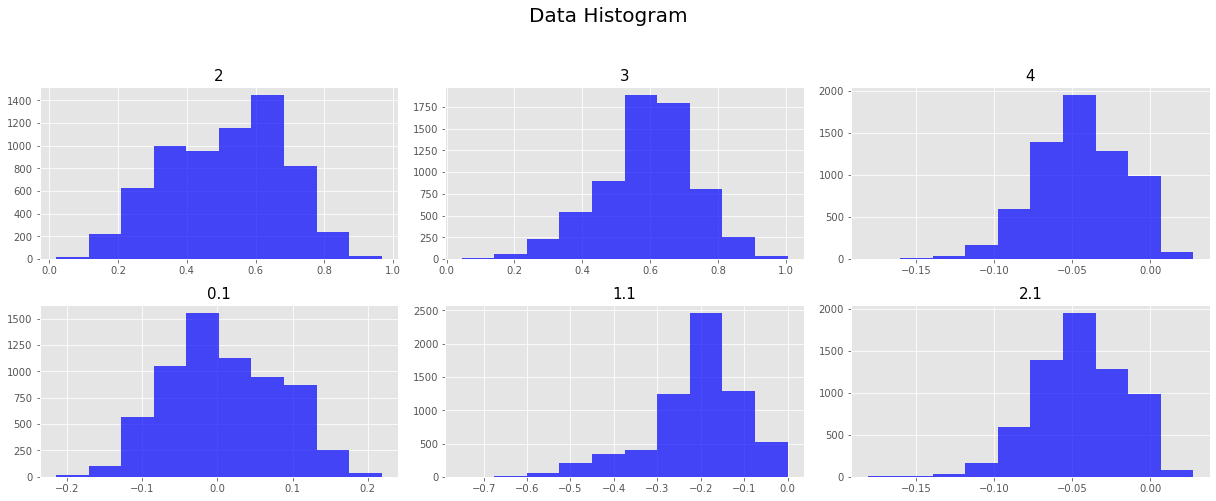

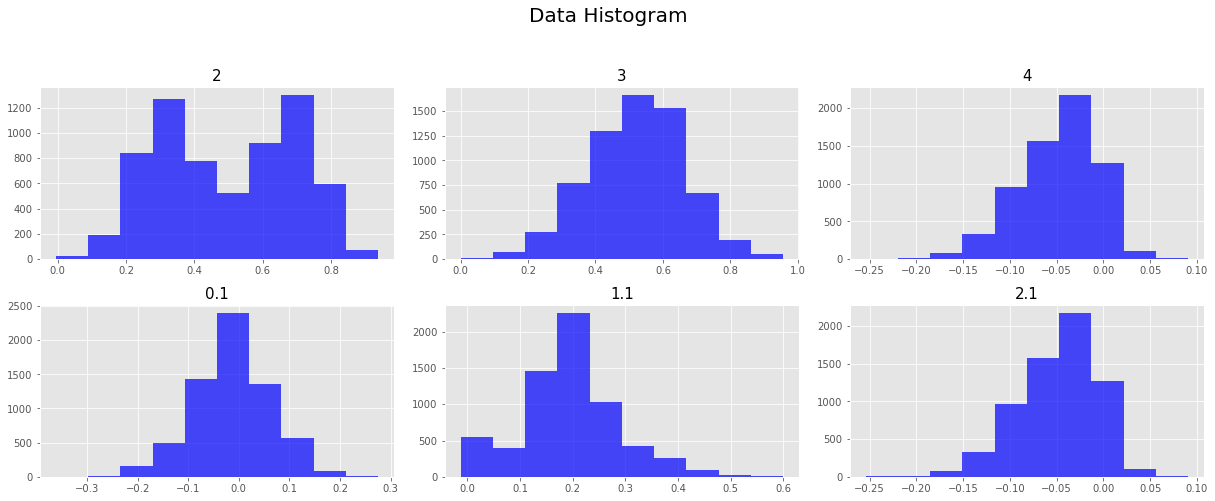

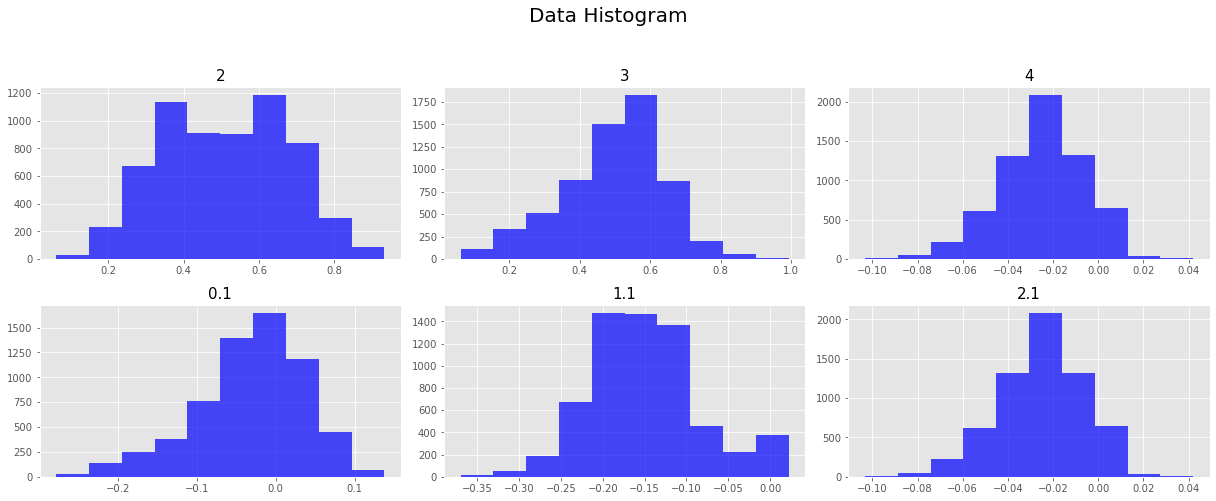

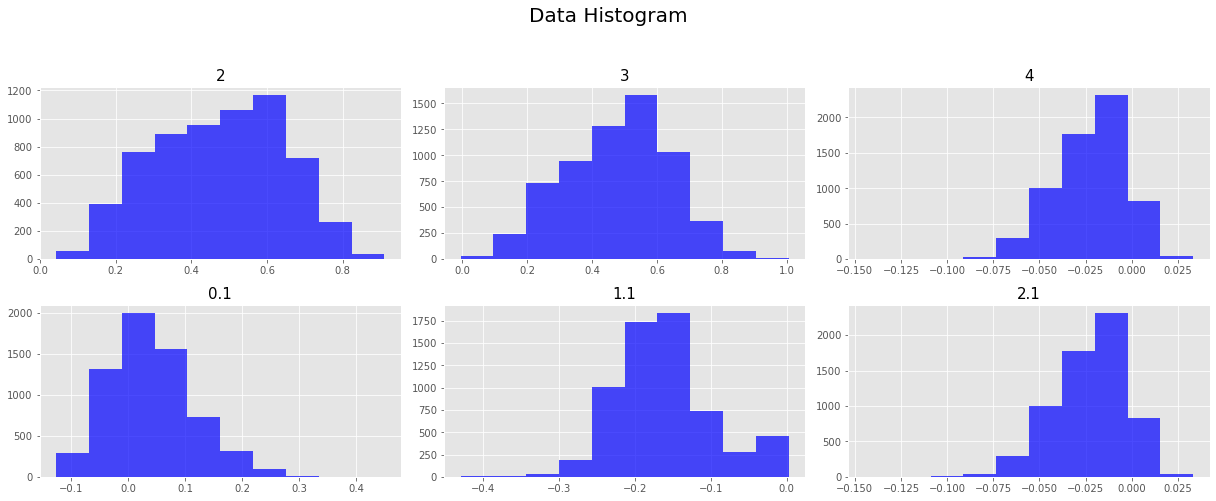

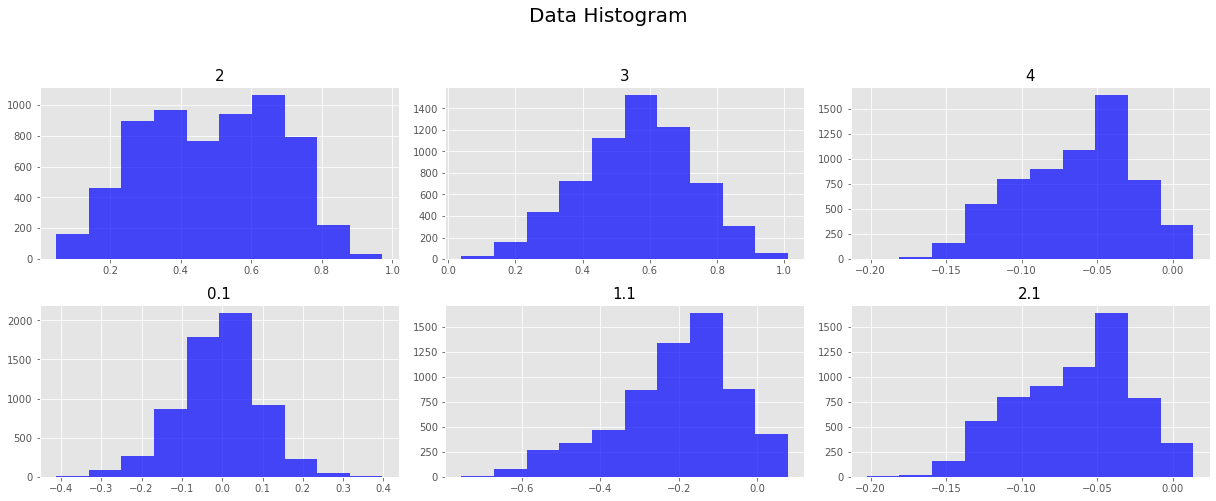

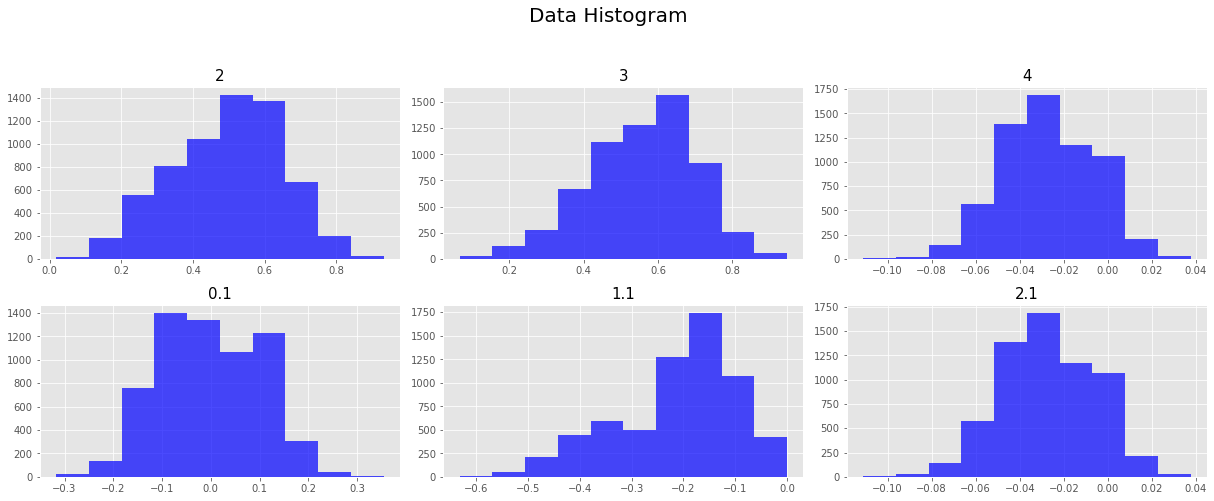

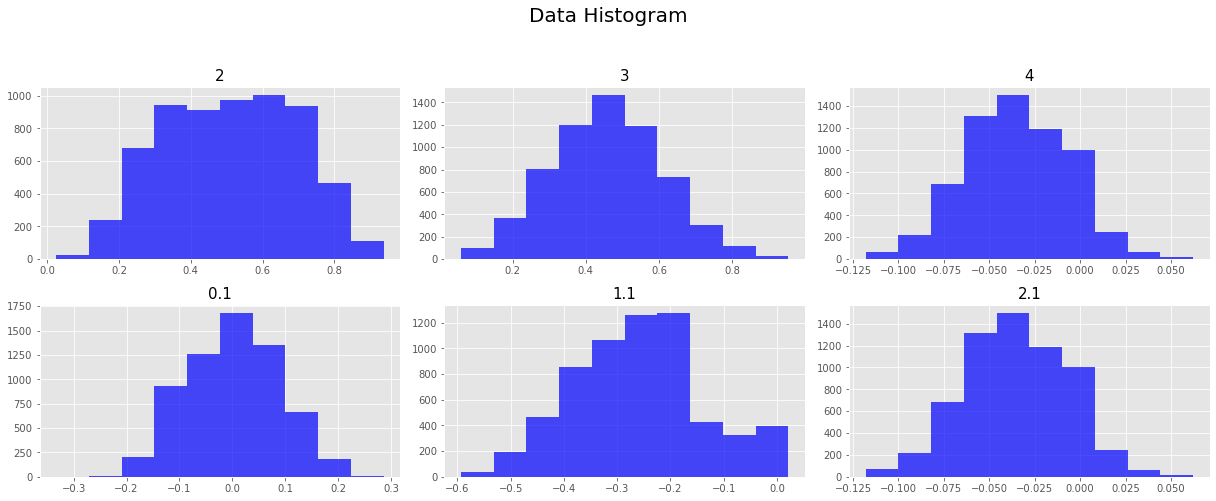

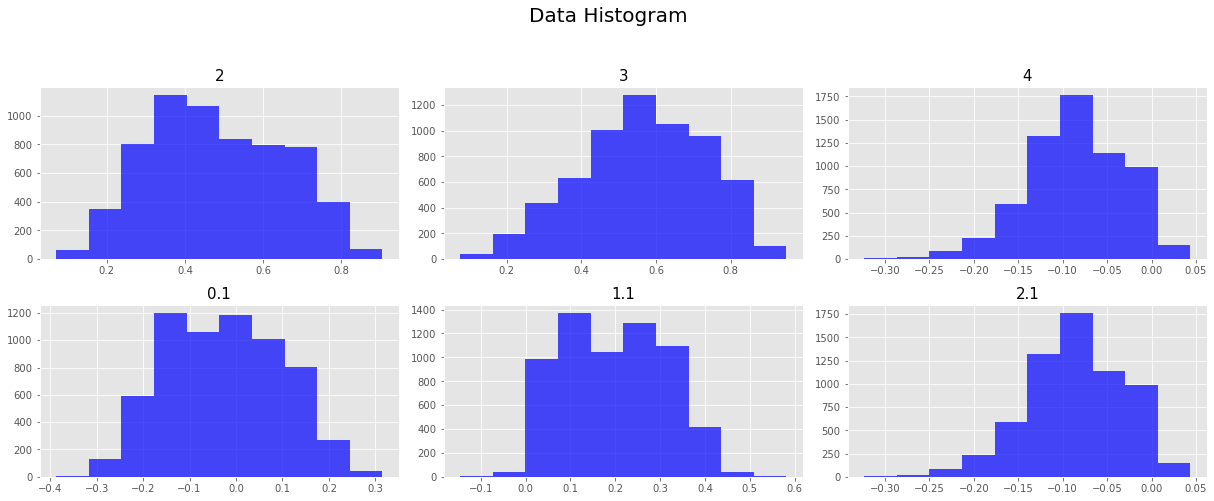

In [8]:
for data in processed_dataset :
    check_histogram(data, ['2', '3', '4', '0.1', '1.1', '2.1'], 3, 3)

## Correlation

In [9]:
# check the data correlation using heatmap
def check_correlation(dataset, row, col) :
    plt.style.use("ggplot") 
    plt.figure(figsize=(15,15))
    
    for i in range(len(dataset)):
        plt.subplot(row,col,i+1)
        plt.title("Heatmap of Correlations of {}".format(i))
        sns.heatmap(dataset[i].corr(), annot=True, cmap="coolwarm")

    plt.tight_layout(rect=[0, 0.01, 1, 0.95])
    plt.show()

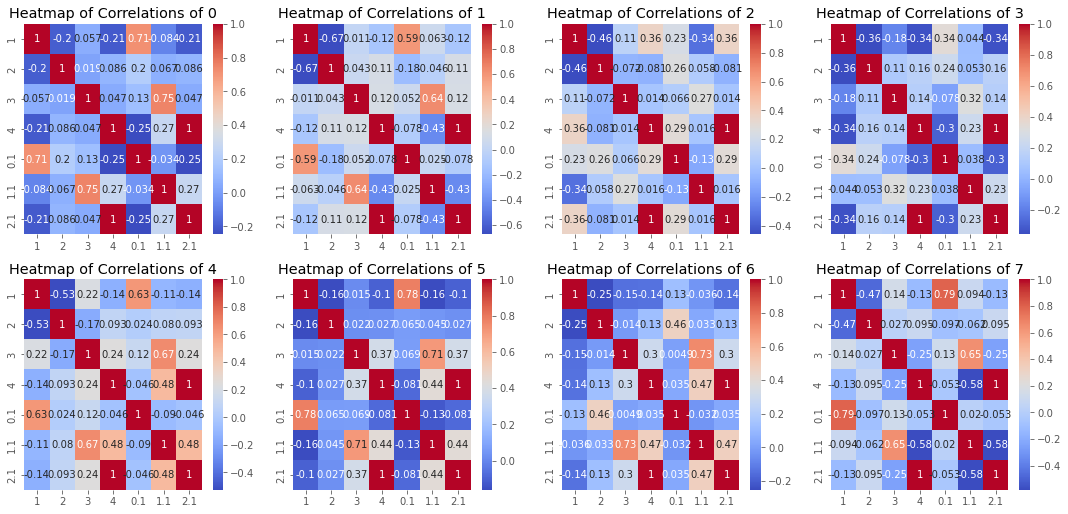

In [10]:
check_correlation(processed_dataset, row=4, col=4)